In [39]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [40]:
features_num = 2
num = 220

In [41]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]

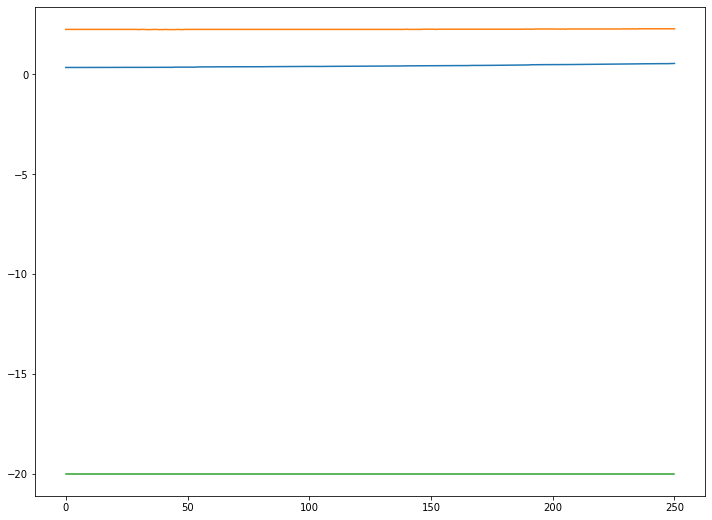

In [42]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [43]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [44]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [45]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 2) (248,)


In [46]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(192, 10, 2) (49, 10, 2)


In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [48]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell23.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [49]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=5, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/50
200/200 [==============================] - 3s 5ms/step - loss: 0.0529 - mean_absolute_error: 0.1396 - val_loss: 0.0016 - val_mean_absolute_error: 0.0355

Epoch 00001: val_loss improved from inf to 0.00161, saving model to models\tmp_checkpointcell23.h5
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0300 - val_loss: 0.0012 - val_mean_absolute_error: 0.0311

Epoch 00002: val_loss improved from 0.00161 to 0.00123, saving model to models\tmp_checkpointcell23.h5
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 6.5599e-04 - mean_absolute_error: 0.0213 - val_loss: 1.8213e-04 - val_mean_absolute_error: 0.0118

Epoch 00003: val_loss improved from 0.00123 to 0.00018, saving model to models\tmp_checkpointcell23.h5
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 1.1489e-04 - mean_absolute_error: 0.0085 - val_loss: 1.1401e-05 - val_mean_absolute_error: 0.0025

Epoch 00004: val_lo

In [50]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[0.30384597]
 [0.30408353]
 [0.30432162]
 [0.30464968]
 [0.30470192]
 [0.30436984]
 [0.3045852 ]
 [0.30450028]
 [0.3047561 ]
 [0.30458072]
 [0.30464274]
 [0.30461887]
 [0.3044351 ]
 [0.30471224]
 [0.30432802]
 [0.30432466]
 [0.3042554 ]
 [0.30439466]
 [0.30463752]
 [0.30503485]
 [0.30534366]
 [0.30559042]
 [0.30587855]
 [0.30557856]
 [0.30578938]
 [0.305908  ]
 [0.305993  ]
 [0.30585524]
 [0.3058611 ]
 [0.3058169 ]
 [0.3056139 ]
 [0.30561563]
 [0.30597192]
 [0.3059892 ]
 [0.30597833]
 [0.3058091 ]
 [0.3058591 ]
 [0.30638883]
 [0.30660322]
 [0.30699083]
 [0.30713877]
 [0.30770096]
 [0.30797714]
 [0.30809426]
 [0.30832055]
 [0.30852398]
 [0.308968  ]
 [0.30907756]
 [0.30935818]
 [0.30936253]
 [0.3098277 ]
 [0.3102876 ]
 [0.3106437 ]
 [0.31100738]
 [0.31100821]
 [0.3110205 ]
 [0.31098747]
 [0.31113577]
 [0.3112301 ]
 [0.31098232]
 [0.3108814 ]
 [0.3105778 ]
 [0.31065196]
 [0.31054908]
 [0.3107002 ]
 [0.31097993]
 [0.3110287 ]
 [0.31122574]
 [0.31158003]
 [0.31160098]
 [0.31180838]
 [0.31

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4480      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


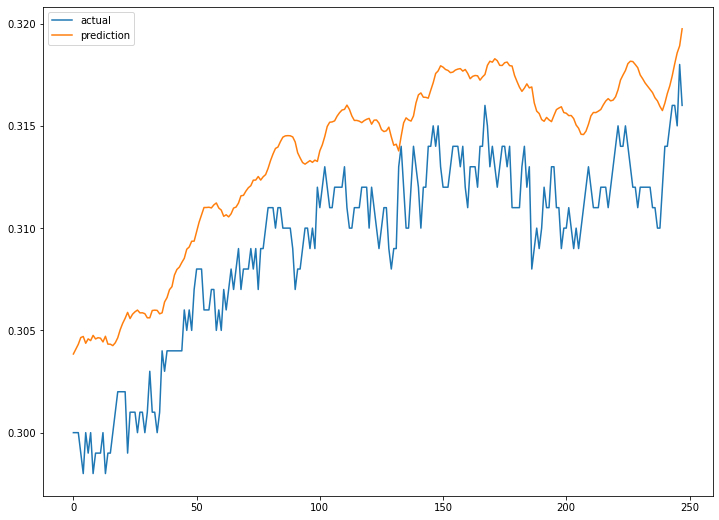

In [51]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [52]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
x_test2 = test_ds2[:, 1:3]
y_test2 = test_ds2[:, 1]

In [53]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

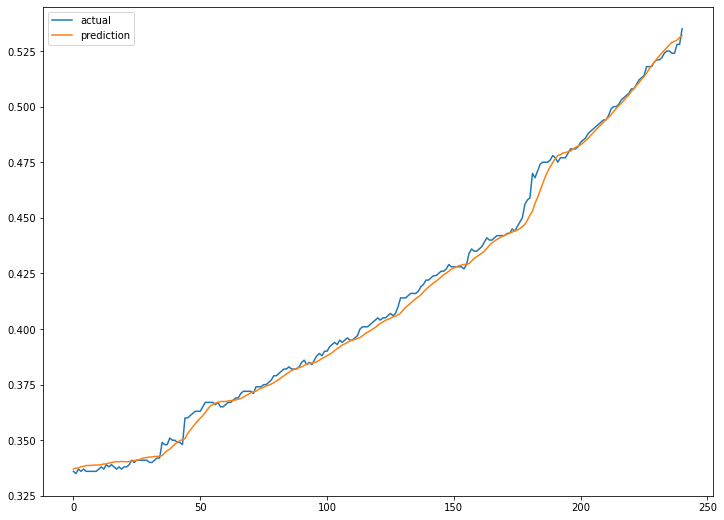

In [54]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.legend()
plt.show()

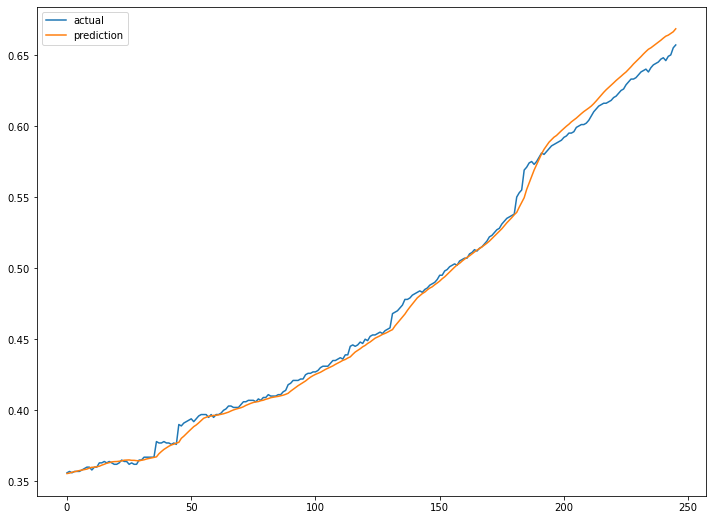

In [55]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
x_test3 = test_ds3[:, 1:3]
y_test3 = test_ds3[:, 1]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 10)

pred3 = model.predict(test_feature3)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.legend()
plt.show()

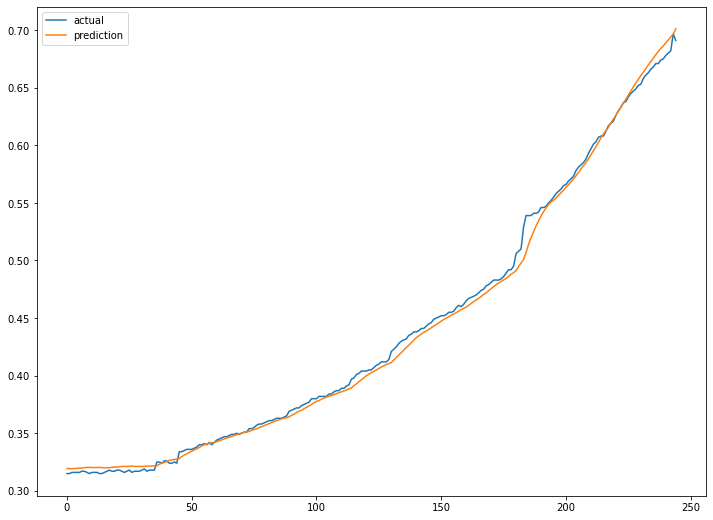

In [56]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
x_test4 = test_ds4[:, 1:3]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.legend()
plt.show()

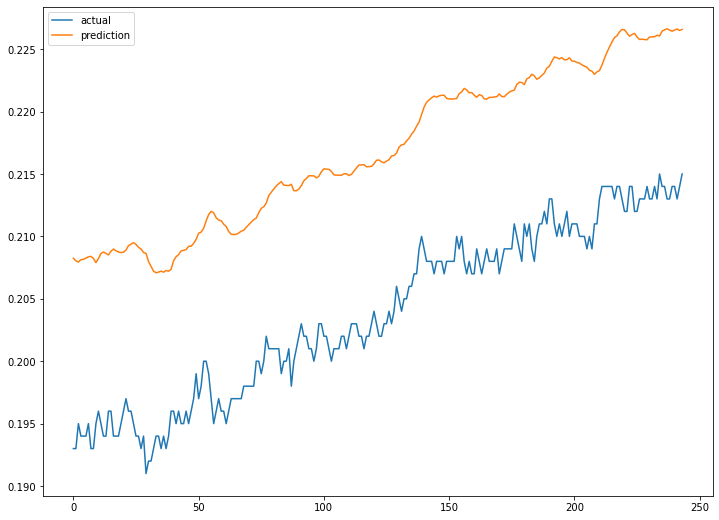

In [57]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
x_test5 = test_ds5[:, 1:3]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.legend()
plt.show()

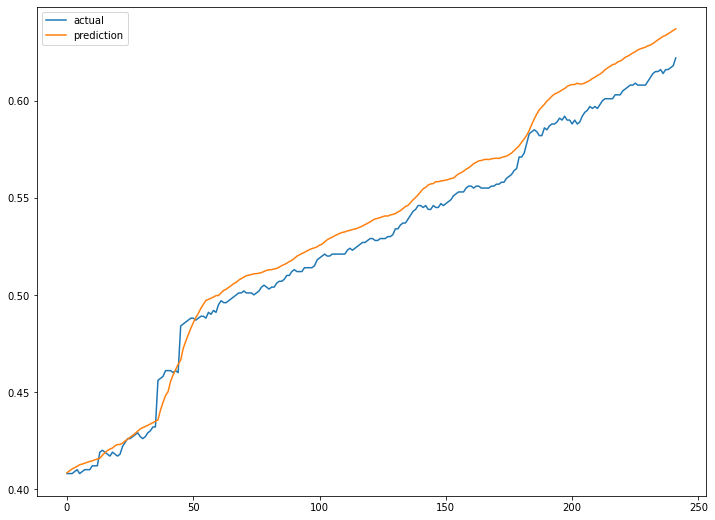

In [58]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
x_test6 = test_ds6[:, 1:3]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.legend()
plt.show()

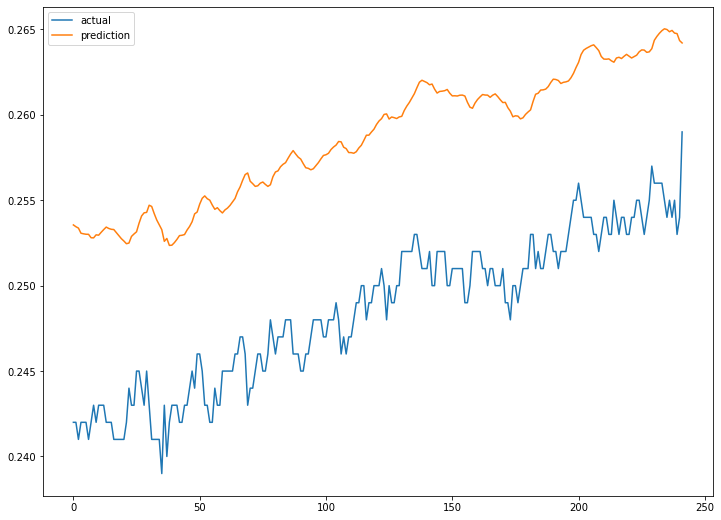

In [59]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
x_test7 = test_ds7[:, 1:3]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.legend()
plt.show()

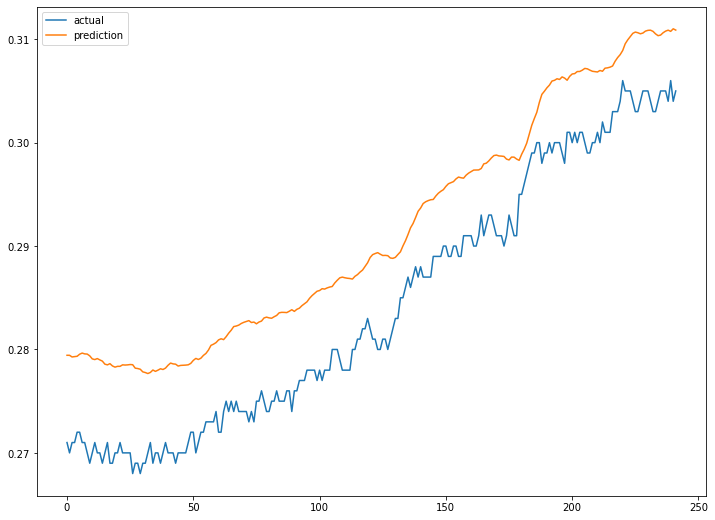

In [60]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
x_test7 = test_ds7[:, 1:3]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.legend()
plt.show()

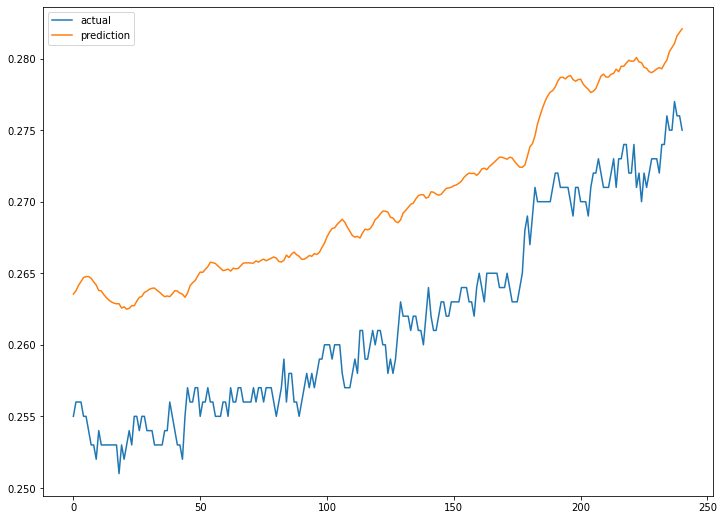

In [61]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
x_test8 = test_ds8[:, 1:3]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.legend()
plt.show()

In [69]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 2)
